<a href="https://colab.research.google.com/github/mohsina680/BuildablesDataScienceFellowship/blob/main/Task07_DS_Buildables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Dataset Loaded Successfully
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Central Tendencies (Sepal Length):
Mean: 5.84
Median: 5.80
Mode: 5.00

Dispersion Measures (Petal Width):
Variance: 0.5810
Standard Deviation: 0.7622

Summary Statistics for All Numeric Features:
                       mean  median  variance       std
sepal length (cm)  5.843333    5.80  0.685694  0.828066
sepal width (cm)   3.057333    3.00  0.189979  0.435866
petal length (cm)  3.758000    4.35  3.116278  1.765298

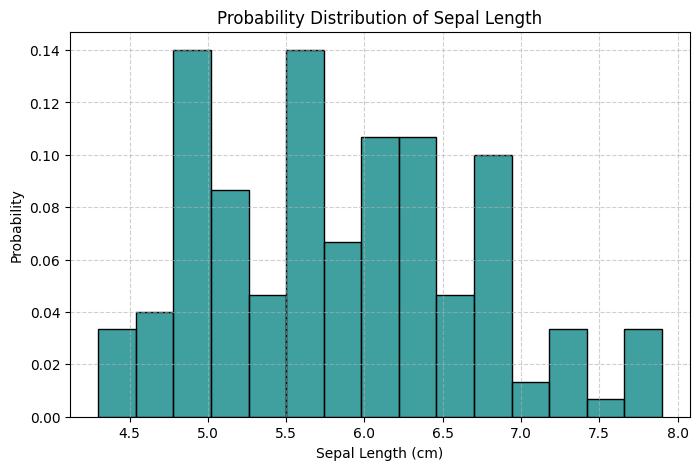

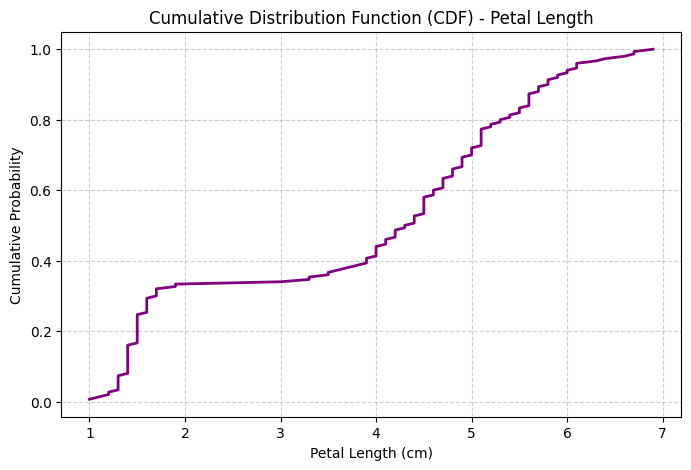

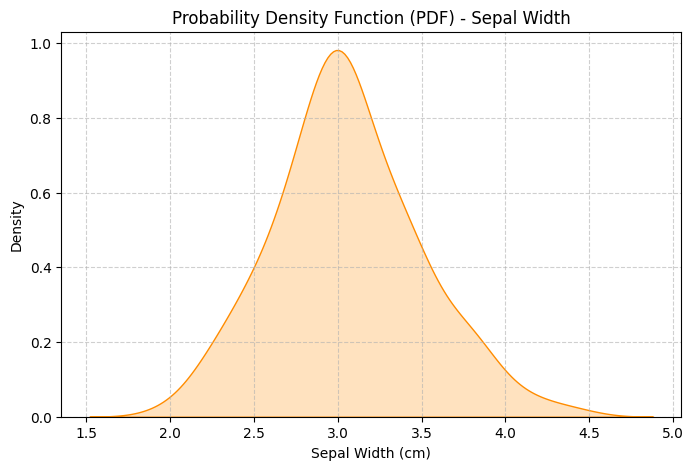


Probability (Petal Length > 4.5 cm): 0.420

Hypothesis Test (Setosa vs Versicolor - Petal Length):
T-statistic: -39.4927
P-value: 0.000000
Result: Significant difference (Reject H0)

Covariance & Correlation (Sepal Length vs Sepal Width):
Covariance: -0.0424
Correlation Coefficient: -0.1176
Negative or No Correlation

Analysis Complete.


In [2]:
# Iris Dataset - Statistical Analysis & Probability

# 1. Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris

%matplotlib inline

# 2. Load Dataset
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

print("Iris Dataset Loaded Successfully")
print(iris.head())

# 3. Descriptive Statistics

# Central Tendencies - Sepal Length
sepal_length = iris['sepal length (cm)']
mean_sl = sepal_length.mean()
median_sl = sepal_length.median()
mode_sl = sepal_length.mode()[0]

print("\nCentral Tendencies (Sepal Length):")
print(f"Mean: {mean_sl:.2f}")
print(f"Median: {median_sl:.2f}")
print(f"Mode: {mode_sl:.2f}")

# Dispersion Measures - Petal Width
petal_width = iris['petal width (cm)']
variance_pw = petal_width.var()
std_pw = petal_width.std()

print("\nDispersion Measures (Petal Width):")
print(f"Variance: {variance_pw:.4f}")
print(f"Standard Deviation: {std_pw:.4f}")

# Summary Statistics for All Numeric Features
numeric_cols = iris.select_dtypes(include=[np.number])
summary = numeric_cols.describe().T[['mean', '50%', 'std']]
summary.rename(columns={'50%': 'median'}, inplace=True)
summary['variance'] = numeric_cols.var()

print("\nSummary Statistics for All Numeric Features:")
print(summary[['mean', 'median', 'variance', 'std']])

# 4. Probability & Distributions

# Probability Distribution (Sepal Length)
prob_dist = sepal_length.value_counts(normalize=True).sort_index()
print("\nProbability Distribution of Sepal Length:")
print(prob_dist)

# Histogram of Sepal Length
plt.figure(figsize=(8, 5))
sns.histplot(sepal_length, kde=False, stat="probability", bins=15, color='teal', edgecolor='black')
plt.title("Probability Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Probability")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# CDF (Petal Length)
petal_length = iris['petal length (cm)']
sorted_pl = np.sort(petal_length)
cdf = np.arange(1, len(sorted_pl)+1) / len(sorted_pl)

plt.figure(figsize=(8, 5))
plt.plot(sorted_pl, cdf, color='purple', linewidth=2)
plt.title("Cumulative Distribution Function (CDF) - Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Cumulative Probability")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# PDF (Sepal Width)
sepal_width = iris['sepal width (cm)']
plt.figure(figsize=(8, 5))
sns.kdeplot(sepal_width, fill=True, color='darkorange')
plt.title("Probability Density Function (PDF) - Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Density")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Probability Estimation (Petal Length > 4.5 cm)
threshold = 4.5
prob_greater = np.mean(petal_length > threshold)
print(f"\nProbability (Petal Length > {threshold} cm): {prob_greater:.3f}")

# 5. Inferential Statistics

# Hypothesis Testing: Setosa vs Versicolor (Petal Length)
setosa = iris[iris['species'] == 'setosa']['petal length (cm)']
versicolor = iris[iris['species'] == 'versicolor']['petal length (cm)']

t_stat, p_val = stats.ttest_ind(setosa, versicolor, equal_var=False)
print("\nHypothesis Test (Setosa vs Versicolor - Petal Length):")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.6f}")

if p_val < 0.05:
    print("Result: Significant difference (Reject H0)")
else:
    print("Result: No significant difference (Fail to reject H0)")

# 6. Covariance & Correlation

cov = np.cov(sepal_length, sepal_width)[0, 1]
corr = np.corrcoef(sepal_length, sepal_width)[0, 1]

print("\nCovariance & Correlation (Sepal Length vs Sepal Width):")
print(f"Covariance: {cov:.4f}")
print(f"Correlation Coefficient: {corr:.4f}")

if corr > 0.7:
    print("Strong Positive Correlation")
elif corr > 0.3:
    print("Moderate Positive Correlation")
elif corr > 0:
    print("Weak Positive Correlation")
else:
    print("Negative or No Correlation")

print("\nAnalysis Complete.")
